**EDA REPORT :**
- loaded and checked dataset shape
- checked datatypes
- data cleaning- dropped unnecessary columns
- checked null values and plotted graph by barchart
- checked the duplicate and unique values for each of the columns
- Grouped data by 'Payment Method' and calculate total 'Transaction Amount' and the count of transactions
- Grouped data by 'Gender', 'Location', and 'Service Used' and calculate average 'Transaction Amount'



In [29]:
#importing and installing necessary libraries
#!pip install missingno
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_excel(r'/content/Report Sheet ___ V2.xlsx')
df.head()

,First Name,Last Name,Full Name,Email,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status
0,Cristi,Jerrome,Cristi Jerrome,cjerrome0@deviantart.com,Agender,32,115.186.14.16,Afghanistan,2022-09-08 00:00:00,Eva,124.48,Stripe,BRONZE
1,Bowie,Agge,Bowie Agge,bagge1@hubpages.com,Male,24,58.229.97.212,Sierra Leone,29/12/2022,STL 1,694.88,Stripe,BRONZE
2,Griz,Slayford,Griz Slayford,gslayford2@weebly.com,Male,24,33.120.228.123,Armenia,24/10/2022,Eva,441.05,Credit Card,GOLD
3,Erika,Matelaitis,Erika Matelaitis,ematelaitis3@com.com,Female,21,43.21.47.25,Armenia,24/08/2023,Eva,453.79,Stripe,IRON
4,Nester,Paulon,Nester Paulon,npaulon4@wix.com,Male,27,99.160.35.96,Armenia,2023-01-05 00:00:00,STL 1,287.75,Stripe,BRONZE


In [3]:
#checking all the columns
df.columns.tolist()

['First Name',
 'Last Name',
 'Full Name',
 'Email',
 'Gender',
 'Age',
 'IP Address',
 'Location',
 'Date of Transaction',
 'Service Used',
 'Transaction Amount',
 'Payment Method',
 'Membership Status']

In [4]:
#dataset shape
df.shape

(600, 13)

In [5]:
#checking the datatypes
df.dtypes

,0
First Name,object
Last Name,object
Full Name,object
Email,object
Gender,object
Age,int64
IP Address,object
Location,object
Date of Transaction,object
Service Used,object


In [6]:
#dropping unnecessary columns
df.drop(['First Name', 'Last Name', 'Email'], axis=1, inplace=True)
df.columns.tolist()

['Full Name',
 'Gender',
 'Age',
 'IP Address',
 'Location',
 'Date of Transaction',
 'Service Used',
 'Transaction Amount',
 'Payment Method',
 'Membership Status']

In [8]:
df.head()

,Full Name,Gender,Age,IP Address,Location,Date of Transaction,Service Used,Transaction Amount,Payment Method,Membership Status
0,Cristi Jerrome,Agender,32,115.186.14.16,Afghanistan,2022-09-08 00:00:00,Eva,124.48,Stripe,BRONZE
1,Bowie Agge,Male,24,58.229.97.212,Sierra Leone,29/12/2022,STL 1,694.88,Stripe,BRONZE
2,Griz Slayford,Male,24,33.120.228.123,Armenia,24/10/2022,Eva,441.05,Credit Card,GOLD
3,Erika Matelaitis,Female,21,43.21.47.25,Armenia,24/08/2023,Eva,453.79,Stripe,IRON
4,Nester Paulon,Male,27,99.160.35.96,Armenia,2023-01-05 00:00:00,STL 1,287.75,Stripe,BRONZE


In [9]:

df.describe()

,Age,Transaction Amount
count,600.000000,600.000000
mean,25.266667,659.874767
std,4.341694,322.415985
min,18.000000,100.210000
25%,22.000000,364.992500
50%,25.000000,649.765000
75%,29.000000,942.410000
max,32.000000,1198.880000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Full Name            600 non-null    object 
 1   Gender               600 non-null    object 
 2   Age                  600 non-null    int64  
 3   IP Address           600 non-null    object 
 4   Location             600 non-null    object 
 5   Date of Transaction  600 non-null    object 
 6   Service Used         600 non-null    object 
 7   Transaction Amount   600 non-null    float64
 8   Payment Method       600 non-null    object 
 9   Membership Status    600 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 47.0+ KB


In [12]:
#checking Null values
null_values = df.isna().sum().sort_values(ascending=True)
null_values

,0
Full Name,0
Gender,0
Age,0
IP Address,0
Location,0
Date of Transaction,0
Service Used,0
Transaction Amount,0
Payment Method,0
Membership Status,0


<Axes: >

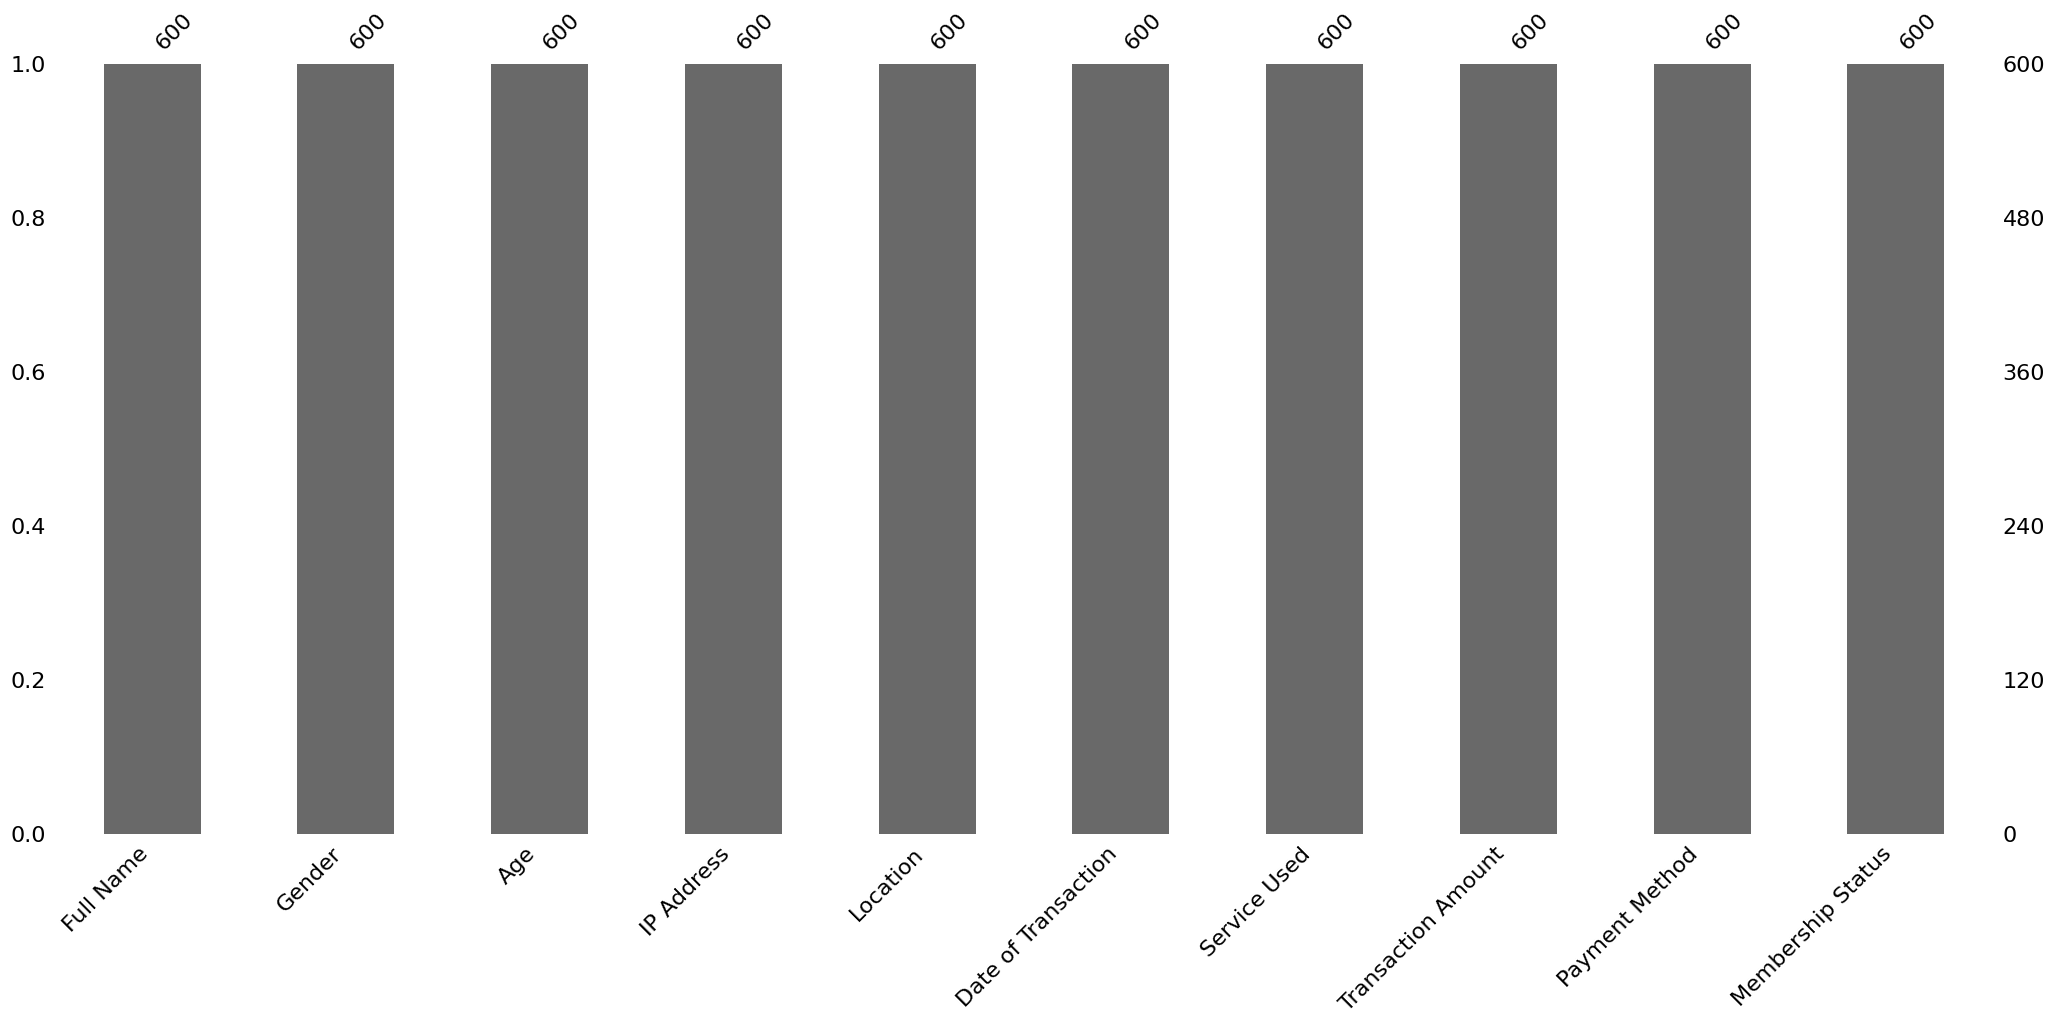

In [15]:
msno.bar(df) #bar plot to check missing values

- no missing value found here.

In [16]:
# Check for duplicated values in all specified columns
duplicate_summary = {col: df[col].duplicated(keep=False).sum() for col in df.columns}

print(duplicate_summary)

{'Full Name': 0, 'Gender': 600, 'Age': 600, 'IP Address': 0, 'Location': 592, 'Date of Transaction': 442, 'Service Used': 600, 'Transaction Amount': 2, 'Payment Method': 600, 'Membership Status': 600}


In [21]:
# Check for unique values in all specified columns
unique_summary = {col: df[col].nunique() for col in df.columns}

print(unique_summary)

{'Full Name': 600, 'Gender': 8, 'Age': 15, 'IP Address': 600, 'Location': 41, 'Date of Transaction': 339, 'Service Used': 4, 'Transaction Amount': 599, 'Payment Method': 5, 'Membership Status': 4}


In [23]:
# Create a DataFrame from the two summaries
summary_df = pd.DataFrame({
    'Duplicate Summary': duplicate_summary,
    'Unique Summary': unique_summary
})

# Display the resulting DataFrame as a table
summary_df

,Duplicate Summary,Unique Summary
Full Name,0,600
Gender,600,8
Age,600,15
IP Address,0,600
Location,592,41
Date of Transaction,442,339
Service Used,600,4
Transaction Amount,2,599
Payment Method,600,5
Membership Status,600,4


In [31]:
df.columns.tolist()

['Full Name',
 'Gender',
 'Age',
 'IP Address',
 'Location',
 'Date of Transaction',
 'Service Used',
 'Transaction Amount',
 'Payment Method',
 'Membership Status']

In [33]:
# Create DataFrame from the sample data
transactionbypayment = pd.DataFrame(df)

# Group by 'Payment Method' and calculate total 'Transaction Amount' and the count of transactions
grouped = transactionbypayment.groupby('Payment Method').agg(
    total_amount=pd.NamedAgg(column='Transaction Amount', aggfunc='sum'),
    transaction_count=pd.NamedAgg(column='Transaction Amount', aggfunc='count')
).reset_index()

# Display the grouped results
print(grouped)

  Payment Method  total_amount  transaction_count
0  Bank Transfer      73120.36                113
1    Credit Card      73796.98                109
2         PayPal      69279.87                109
3         Stripe      99330.60                148
4           Wise      80397.05                121


In [35]:
# Create DataFrame from the sample data
transactions = pd.DataFrame(df)

# Group by 'Gender', 'Location', and 'Service Used' and calculate average 'Transaction Amount'
grouped_avg = transactions.groupby(['Gender', 'Location', 'Service Used']).agg(
    average_transaction_amount=pd.NamedAgg(column='Transaction Amount', aggfunc='mean'),
    transaction_count=pd.NamedAgg(column='Transaction Amount', aggfunc='count')
).reset_index()

# Display the grouped results
print(grouped_avg)

         Gender      Location Service Used  average_transaction_amount  \
0       Agender   Afghanistan          Eva                     124.480   
1       Agender       Armenia          Eva                     247.350   
2       Agender       Armenia        STL 1                     549.290   
3       Agender    Azerbaijan        STL 1                    1046.110   
4       Agender  Burkina Faso        STL 2                     228.650   
..          ...           ...          ...                         ...   
222  Polygender  Sierra Leone          Exp                     724.535   
223  Polygender      Tanzania          Eva                     744.090   
224  Polygender      Tanzania          Exp                     635.160   
225  Polygender      Tanzania        STL 1                     787.115   
226  Polygender      Tanzania        STL 2                     841.800   

     transaction_count  
0                    1  
1                    1  
2                    1  
3          